In [1]:
import numpy as np
import matplotlib.pyplot as plt

(-1.5, 1.5)

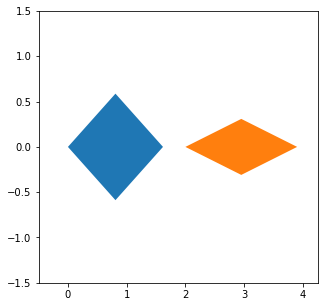

In [2]:
## Define the two rhombuses of P3

def Large_rhomb(x,y):
    # Give x and y which corresponds to the coordinates of the left most vertex

    # Define angles
    small_angle = 72 * (np.pi/180)
    large_angle = 108 * (np.pi/180)
    
    # Define the largest diagonal. This is the diagonal along which the Robinson triangle decomposition is made
    B_L = (1 + np.sqrt(5))/(2)

    # Define all four vertex coordinates
    f = [(x, y), (x + np.cos(small_angle/2), y + np.sin(small_angle/2)), (x + B_L, y), (x + np.cos(small_angle/2) , y - np.sin(small_angle/2))]

    xs = [x, x+np.cos(small_angle/2), x+B_L, x+np.cos(small_angle/2)]
    ys = [y, y+np.sin(small_angle/2), y, y-np.sin(small_angle/2)]
    return xs, ys
    
def Small_rhomb(x,y):
    # Give x and y which corresponds to the coordinates of the left most vertex

    # Define angles
    small_angle = 36 * (np.pi/180)
    large_angle = 144 * (np.pi/180)
    
    # Define the largest diagonal. This is the diagonal along which the Robinson triangle decomposition is made
    B_S = (np.sqrt(5) - 1)/(2)

    # Define all four vertex coordinates

    xs = [x, x+np.cos(small_angle/2), x+2*np.cos(small_angle/2), x+np.cos(small_angle/2)]
    ys = [y, y + (1/2)*B_S, y, y - (1/2)*B_S]
    
    return xs, ys

# Draw the two rhombuses 

fig, ax = plt.subplots(figsize=(5,5))

ax.fill(Large_rhomb(0,0)[0], Large_rhomb(0,0)[1])
ax.fill(Small_rhomb(2,0)[0], Small_rhomb(2,0)[1])

ax.set_xlim([-0.5,4.25])
ax.set_ylim([-1.5,1.5])

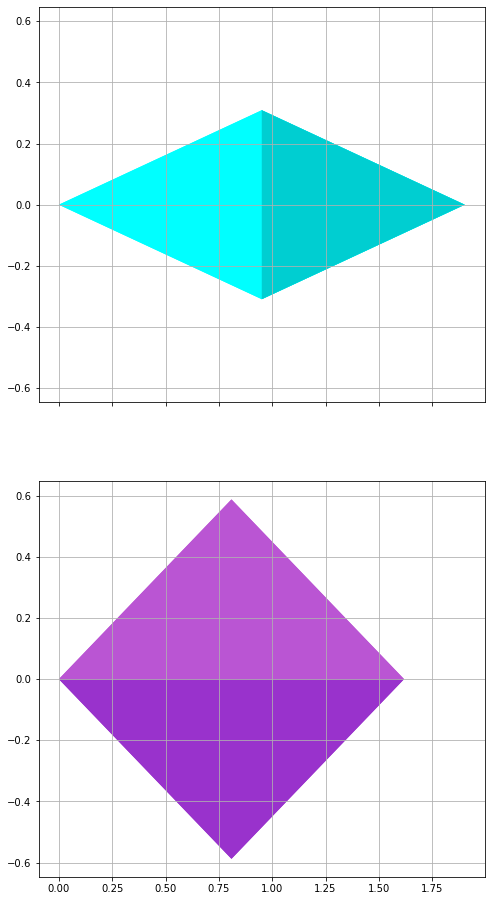

In [3]:
## Attempt to draw two Robinson triangles from one rhombus

fig, ax = plt.subplots(2, figsize=(8,16), sharex= True, sharey= True)

for i in [0,0,1,1]:
    if i == 0:
        xs, ys = Small_rhomb(0,0)
        left_xs = xs[0:2] + xs[-3:]
        left_ys = ys[0:2] + ys[-3:]
        right_xs = xs[1:]
        right_ys = ys[1:]
        ax[i].fill(left_xs, left_ys, "cyan")
        ax[i].fill(right_xs, right_ys, "darkturquoise")
        ax[i].grid(1)

    if i == 1:
        xs, ys = Large_rhomb(0,0)
        top_xs = xs[0:3]
        top_ys = ys[0:3]
        bottom_xs = xs[:1] + xs[-2:]
        bottom_ys = ys[:1] + ys[-2:]
        ax[i].fill(top_xs, top_ys, "mediumorchid")
        ax[i].fill(bottom_xs, bottom_ys, "darkorchid")
        ax[i].grid(1)

(-2.0, 2.0)

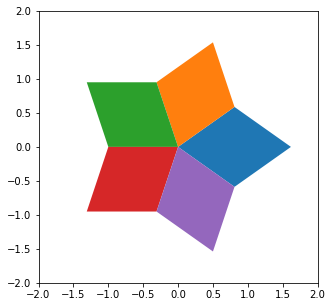

In [4]:
## Attempt at creating a base for the tiling by simply rotating the largest rhombus around origin

# I will reference to
# https://tartarus.org/~simon/20110412-penrose/penrose.xhtml

fig, ax = plt.subplots(figsize=(5,5))

xs, ys = Large_rhomb(0,0)

Ps = [np.array([x,y]) for x, y in zip(xs, ys)]

# Define rotation operator
def Rotation_test(angle):
    operator = [[np.cos(angle), -np.sin(angle)],[np.sin(angle), np.cos(angle)]]
    return operator

# Rotate points one time around one time with an angle of 72 degrees
theta = 72 * (np.pi/180)

Xss = []
Yss = []
for i in [0,1,2,3,4]:
    ps = [np.matmul(np.array(Rotation_test(i * theta)),v) for v in Ps]
    xs  = [x[0] for x in ps]
    ys  = [y[1] for y in ps]
    Xss.append(xs)
    Yss.append(ys)

for i, j in zip(Xss, Yss):
    ax.fill(i,j)
    

ax.set_xlim([-2,2])
ax.set_ylim([-2,2])

(-1.5, 1.5)

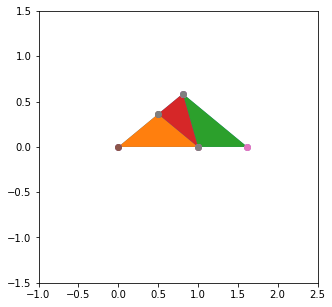

In [5]:
## Attempt at decomposition of one of the large RTs

fig, ax = plt.subplots(figsize=(5,5))

xs, ys = Large_rhomb(0,0)

xs_top = xs[:3]
ys_top = ys[:3]

P_top = np.array([(x,y) for x,y in zip(xs_top, ys_top)])

# Define three operators for manipulating coordinates. Note the translation operator takes a vector directly, i.e. it's not used in matrix multiplication
def Rotation(angle):
    phi = angle * (np.pi/180)
    operator = np.array([[np.cos(phi), -np.sin(phi)],[np.sin(phi), np.cos(phi)]])
    return operator

def Scaling(scale, Samescale= True):
    if Samescale == True:
        operator = np.array([[scale, 0],[0, scale]])
    elif Samescale == False:
        operator = np.array([[scale[0], 0],[0, scale[1]]])
    return operator

def Translation(vector, coordinate):
    operator = vector + np.array([coordinate[0], coordinate[1]])
    return operator

phi = (1 + np.sqrt(5))/(2)

theta = 144


A2_sub = [np.matmul(Scaling(1/phi),x) for x in P_top]
A1_rot = [np.matmul(Rotation(theta),x) for x in A2_sub]
A1_sub = [Translation(x, (phi,0)) for x in A1_rot]



# Pick anchor point for small triangle generation and well generate through translation and rotation
overlap_point = A2_sub[2]

temp_point_1 = Translation(overlap_point, (-(1/phi), 0))
rot_1 = np.matmul(Rotation(108),temp_point_1)
trans_rot_1 = Translation(rot_1,(1/phi,0))

rot_2 = np.matmul(Rotation(36), overlap_point)

B1_sub = [overlap_point, trans_rot_1, rot_2]

xs_a2 = [x for x,y in A2_sub]
ys_a2 = [y for x,y in A2_sub]
xs_a1 = [x for x,y in A1_sub]
ys_a1 = [y for x,y in A1_sub]
xs_b1 = [x for x,y in B1_sub]
ys_b1 = [y for x,y in B1_sub]

# Plotting
Points = [P_top, A2_sub, A1_sub, B1_sub]

for i in Points:
    xs = [x for x,y in i]
    ys = [y for x,y in i]
    ax.fill(xs,ys)

ax.scatter(xs_top,ys_top)
ax.scatter(xs_a2,ys_a2)
ax.scatter(xs_a1,ys_a1)
ax.scatter(xs_b1,ys_b1)
ax.set_xlim([-1,2.5])
ax.set_ylim([-1.5,1.5])

(-1.5, 1.5)

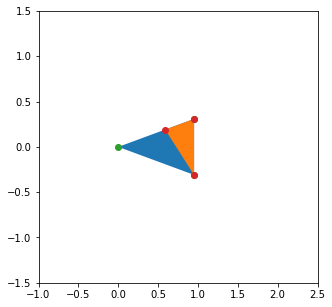

In [6]:
## Attempt at decomposition of one of the small RTs

fig, ax = plt.subplots(figsize=(5,5))

xs, ys = Small_rhomb(0,0)

xs_left = xs[0:2] + xs[-1:]
ys_left = ys[0:2] + ys[-1:]

P_left = np.array([(x,y) for x,y in zip(xs_left, ys_left)])

# The scaling for this is now straight up phi/1 = phi as opposed to the 1/phi from large rhomb
phi = (np.sqrt(5) - 1)/(2)

theta = 108

B_scale = [np.matmul(Scaling(phi),x) for x in P_left]
B_rot = [np.matmul(Rotation(theta),x) for x in B_scale]
B_sub = [Translation(x, (P_left[2])) for x in B_rot]

Points = [P_left, B_sub]

xs_b = [x for x,y in B_sub]
ys_b = [y for x,y in B_sub]


for i in Points:
    xs = [x for x,y in i]
    ys = [y for x,y in i]
    ax.fill(xs,ys)

ax.scatter(xs_left,ys_left)
ax.scatter(xs_b,ys_b)
ax.set_xlim([-1,2.5])
ax.set_ylim([-1.5,1.5])

In [7]:
## SUMMARISING FUNCTIONS DEFINED
## Define the two rhombuses of P3

def Large_rhomb(x,y):
    # Give x and y which corresponds to the coordinates of the left most vertex

    # Define angles
    small_angle = 72 * (np.pi/180)
    large_angle = 108 * (np.pi/180)
    
    # Define the largest diagonal. This is the diagonal along which the Robinson triangle decomposition is made
    B_L = (1 + np.sqrt(5))/(2)

    # Define all four vertex coordinates
    f = [(x, y), (x + np.cos(small_angle/2), y + np.sin(small_angle/2)), (x + B_L, y), (x + np.cos(small_angle/2) , y - np.sin(small_angle/2))]

    xs = [x, x+np.cos(small_angle/2), x+B_L, x+np.cos(small_angle/2)]
    ys = [y, y+np.sin(small_angle/2), y, y-np.sin(small_angle/2)]
    return xs, ys
    
def Small_rhomb(x,y):
    # Give x and y which corresponds to the coordinates of the left most vertex

    # Define angles
    small_angle = 36 * (np.pi/180)
    large_angle = 144 * (np.pi/180)
    
    # Define the largest diagonal. This is the diagonal along which the Robinson triangle decomposition is made
    B_S = (np.sqrt(5) - 1)/(2)

    # Define all four vertex coordinates

    xs = [x, x+np.cos(small_angle/2), x+2*np.cos(small_angle/2), x+np.cos(small_angle/2)]
    ys = [y, y + (1/2)*B_S, y, y - (1/2)*B_S]
    
    return xs, ys

## Define three operators for manipulating coordinates. Note the translation operator takes a vector directly, i.e. it's not used in matrix multiplication
def Rotation(angle):
    phi = angle * (np.pi/180)
    operator = np.array([[np.cos(phi), -np.sin(phi)],[np.sin(phi), np.cos(phi)]])
    return operator

def Scaling(scale, Samescale= True):
    if Samescale == True:
        operator = np.array([[scale, 0],[0, scale]])
    elif Samescale == False:
        operator = np.array([[scale[0], 0],[0, scale[1]]])
    return operator

def Translation(vector, coordinate):
    operator = vector + np.array([coordinate[0], coordinate[1]])
    return operator

# For calculating a unit vector of any given vector
def unit_vector(vector):
    unit_vector = vector/(np.linalg.norm(vector))
    return unit_vector

# For calculating angle between vectors
def angle_between(v1, v2):
    u_v1 = unit_vector(v1)
    u_v2 = unit_vector(v2)
    dot_product = np.dot(u_v1, u_v2)
    # To fix parallel and antiparallel cases use np.clip
    # See more on https://numpy.org/doc/stable/reference/generated/numpy.clip.html - last checked 01-02-2023
    # Calculate angle
    theta = np.arccos(np.clip(dot_product, -1.0, 1.0)) * (180/np.pi)
    return theta

# Define subvision of a P tile located in the origin, of an n'th interaction
def P_sub(vector, trans_vector, rotation_angle, n= 1):
    # The scaling for this is now straight up phi/1 = phi as opposed to the 1/phi from large rhomb
    phi = (np.sqrt(5) - 1)/(2)

    theta = 108

    tmp_scale = [np.matmul(Scaling(n*phi),x) for x in vector]
    tmp_rot = [np.matmul(Rotation(theta),x) for x in tmp_scale]
    tmp_trans = [Translation(x, (vector[2])) for x in tmp_rot]

    tmp_rerot = [np.matmul(Rotation(rotation_angle),x) for x in tmp_trans]
    tmp_retrans = [Translation(x, (trans_vector)) for x in tmp_rerot]

    # Create the two new triangles by using new points arising from final manipulation
    Sub_P = tmp_retrans
    Sub_Qm = np.stack((Translation(vector[0],(trans_vector)), tmp_retrans[1], tmp_retrans[0]), axis=0)

    return Sub_P, Sub_Qm

# Define subvision of a Pm tile located in the origin, of an n'th interaction
def Pm_sub(vector, trans_vector, rotation_angle, n= 1):
    # The scaling for this is now straight up phi/1 = phi as opposed to the 1/phi from large rhomb
    phi = (np.sqrt(5) - 1)/(2)

    theta = 108

    tmp_scale = [np.matmul(Scaling(n*phi),x) for x in vector]
    tmp_rot = [np.matmul(Rotation(theta),x) for x in tmp_scale]
    tmp_trans = [Translation(x, (vector[2])) for x in tmp_rot]

    tmp_rerot = [np.matmul(Rotation(rotation_angle),x) for x in tmp_trans]
    tmp_retrans = [Translation(x, (trans_vector)) for x in tmp_rerot]

    # Create the two new triangles by using new points arising from final manipulation
    Sub_Pm = tmp_retrans
    Sub_Q = np.stack((Translation(vector[0],(trans_vector)), tmp_retrans[1], tmp_retrans[0]), axis=0)

    return Sub_Pm, Sub_Q


# Define subvision of a Qm tile located in the origin, of an n'th interaction
def Qm_sub(vector, trans_vector, rotation_angle, n= 1):
    # The scaling for this is now straight up phi/1 = phi as opposed to the 1/phi from large rhomb
    phi = (np.sqrt(5) + 1)/(2)

    theta = 144

    # Define a temporary building block of subdivided Q and Qm
    tmp_scale_block = [np.matmul(Scaling(1/phi),x) for x in vector]

    # The subdivided Q can be translated by differene of rightmost vertex in the triangle. This is in the subdivided and rotated Qm
    # Thus we can define a translation vector
    trns_vct = vector[2] - tmp_scale_block[2]

    tmp_Q_trans = [Translation(x,(trns_vct)) for x in tmp_scale_block]

    tmp_Qm_rot = [np.matmul(Rotation(216),x) for x in tmp_scale_block]
    tmp_Qm_trans = [Translation(x, ((-1)*tmp_Qm_rot[2])) for x in tmp_Qm_rot]

    # Pick anchor point for small triangle generation and well generate through translation and rotation
    overlap_point = tmp_Q_trans[0]


    # Combine new points from existing. We choose points such that the new conform to 1st being in the left vertex, the 2nd being clockwise the next upcoming and so on for the 3rd
    tmp_Pm = [overlap_point, tmp_Qm_trans[0], tmp_Q_trans[1]]

    # Now we rotate the back to the original rotation angle
    tmp_Q_rerot = [np.matmul(Rotation(rotation_angle),x) for x in tmp_Q_trans]
    tmp_Qm_rerot = [np.matmul(Rotation(rotation_angle),x) for x in tmp_Qm_trans]
    tmp_Pm_rerot = [np.matmul(Rotation(rotation_angle),x) for x in tmp_Pm]

    # Move temp figures
    tmp_Q_retrans = [Translation(x, (trans_vector)) for x in tmp_Q_rerot]
    tmp_Qm_retrans = [Translation(x, (trans_vector)) for x in tmp_Qm_rerot]
    tmp_Pm_retrans = [Translation(x, (trans_vector)) for x in tmp_Pm_rerot]

    # Create the two new triangles by using new points arising from final manipulation
    Sub_Q = tmp_Q_retrans
    Sub_Qm = tmp_Qm_retrans
    Sub_Pm = tmp_Pm_retrans
    return Sub_Pm, Sub_Q, Sub_Qm

# Define subvision of a Q tile located in the origin, of an n'th interation
def Q_sub(vector, trans_vector, rotation_angle, n= 1):
    # The scaling for this is now straight up phi/1 = phi as opposed to the 1/phi from large rhomb
    phi = (np.sqrt(5) + 1)/(2)

    theta = 144

    # Define a temporary building block of subdivided Q and Qm, though it now also serves as subdivided Qm in Q
    tmp_Qm = [np.matmul(Scaling(1/phi),x) for x in vector]

    tmp_Q_rot = [np.matmul(Rotation(144),x) for x in tmp_Qm]
    tmp_Q_trans = [Translation(x, ((-1)*tmp_Q_rot[1] + tmp_Qm[2])) for x in tmp_Q_rot]

    # Pick anchor point for small triangle generation and well generate through translation and rotation
    overlap_point = tmp_Qm[2]


    # Combine new points from existing. We choose points such that the new conform to 1st being in the left vertex, the 2nd being clockwise the next upcoming and so on for the 3rd
    tmp_Pm = [overlap_point, tmp_Qm[1], tmp_Q_trans[2]]

    # Now we rotate the back to the original rotation angle
    tmp_Q_rerot = [np.matmul(Rotation(rotation_angle),x) for x in tmp_Q_trans]
    tmp_Qm_rerot = [np.matmul(Rotation(rotation_angle),x) for x in tmp_Qm]
    tmp_Pm_rerot = [np.matmul(Rotation(rotation_angle),x) for x in tmp_Pm]

    # Move temp figures
    tmp_Q_retrans = [Translation(x, (trans_vector)) for x in tmp_Q_rerot]
    tmp_Qm_retrans = [Translation(x, (trans_vector)) for x in tmp_Qm_rerot]
    tmp_Pm_retrans = [Translation(x, (trans_vector)) for x in tmp_Pm_rerot]

    # Create the two new triangles by using new points arising from final manipulation
    Sub_Q = tmp_Q_retrans
    Sub_Qm = tmp_Qm_retrans
    Sub_Pm = tmp_Pm_retrans
    return Sub_Pm, Sub_Q, Sub_Qm



In [8]:
## Define operations to take an arbitrary triangle and subdivide it into predefined triangles

# Define the Small Rhombs triangles as left_RT := P and right_RT := P'. Similar for Large Rhombs Top_RT := Q and Bottom_RT := Q'

# Define the subdivision of a P
def Subdivision_P(list_of_vectors):
    i = list_of_vectors
    # First we translate the vectors from an arbitrary point in the plane back to the origin
    # Identify using the anchor point the needed translation
    anchor_point = i[0]
    # Now translate the points to the origin by Translate call
    tmp_1 = [Translation(x, (-1)*anchor_point) for x in i]

    # Now check angle of relative to the x-axis, we check non anchor points!
    p1_theta = np.arctan2(tmp_1[1][1],tmp_1[1][0]) * (180/np.pi)

    # We want to rotate such that the top vector is 18 degrees above x-axis
    correction_theta = 378 - p1_theta
    back_theta = p1_theta - 18
    tmp_1 = [np.matmul(Rotation(correction_theta),x) for x in tmp_1]
    Sub_P, Sub_Qm = P_sub(tmp_1, trans_vector= anchor_point, rotation_angle= back_theta)
    Points = [Sub_P, Sub_Qm]
    colours = ["cyan","darkorchid"]
    for j,k in zip(Points,colours):
        xs = [x for x,y in j]
        ys = [y for x,y in j]
        ax.fill(xs,ys,color= k)
    return Sub_P, Sub_Qm

# Define the subdivision of a P
def Subdivision_Pm(list_of_vectors):
    i = list_of_vectors
    # First we translate the vectors from an arbitrary point in the plane back to the origin
    # Identify using the anchor point the needed translation
    anchor_point = i[0]
    # Now translate the points to the origin by Translate call
    tmp_1 = [Translation(x, (-1)*anchor_point) for x in i]

    # Now check angle of relative to the x-axis, we check non anchor points!
    p1_theta = np.arctan2(tmp_1[1][1],tmp_1[1][0]) * (180/np.pi)

    # We want to rotate such that the top vector is 18 degrees above x-axis
    correction_theta = 378 - p1_theta
    back_theta = p1_theta - 18
    tmp_1 = [np.matmul(Rotation(correction_theta),x) for x in tmp_1]
    Sub_Pm, Sub_Q = P_sub(tmp_1, trans_vector= anchor_point, rotation_angle= back_theta)
    Points = [Sub_Pm, Sub_Q]
    colours = ["darkturquoise","mediumorchid"]
    for j,k in zip(Points,colours):
        xs = [x for x,y in j]
        ys = [y for x,y in j]
        ax.fill(xs,ys,color= k)
    return Sub_Pm, Sub_Q


# Define subdivision of a Qm
def Subdivision_Qm(list_of_vectors):
    i = list_of_vectors
    # First we translate the vectors from an arbitrary point in the plane back to the origin
    # Identify using the anchor point the needed translation
    anchor_point = i[0]
    # Now translate the points to the origin by Translate call
    tmp_1 = [Translation(x, (-1)*anchor_point) for x in i]

    # Now check angle of relative to the x-axis, we check non anchor points!
    p1_theta = np.arctan2(tmp_1[1][1],tmp_1[1][0]) * (180/np.pi)

    # We want to rotate such that the top vector is 36 degrees above x-axis
    correction_theta = 396 - p1_theta
    back_theta = p1_theta - 36
    tmp_1 = [np.matmul(Rotation(correction_theta),x) for x in tmp_1]
    Sub_Pm, Sub_Q, Sub_Qm = Qm_sub(tmp_1, trans_vector= anchor_point, rotation_angle= back_theta)
    Points = [Sub_Pm, Sub_Q, Sub_Qm]
    colours = ["darkturquoise", "mediumorchid", "darkorchid"]
    for j,k in zip(Points,colours):
        xs = [x for x,y in j]
        ys = [y for x,y in j]
        ax.fill(xs,ys,color= k)
    return Sub_Pm, Sub_Q, Sub_Qm


# Define subdivision of a Q
def Subdivision_Q(list_of_vectors):
    i = list_of_vectors
    # First we translate the vectors from an arbitrary point in the plane back to the origin
    # Identify using the anchor point the needed translation
    anchor_point = i[0]
    # Now translate the points to the origin by Translate call
    tmp_1 = [Translation(x, (-1)*anchor_point) for x in i]

    # Now check angle of relative to the x-axis, we check non anchor points!
    p1_theta = np.arctan2(tmp_1[1][1],tmp_1[1][0]) * (180/np.pi)
    

    # We want to rotate such that the top vector is 36 degrees above x-axis
    correction_theta = 396 - p1_theta
    back_theta = p1_theta - 36
    tmp_1 = [np.matmul(Rotation(correction_theta),x) for x in tmp_1]
    Sub_P, Sub_Q, Sub_Qm = Q_sub(tmp_1, trans_vector= anchor_point, rotation_angle= back_theta)
    Points = [Sub_P, Sub_Q, Sub_Qm]
    colours = ["cyan", "mediumorchid", "darkorchid"]
    for j,k in zip(Points,colours):
        xs = [x for x,y in j]
        ys = [y for x,y in j]
        ax.fill(xs,ys,color= k)
    return Sub_P, Sub_Q, Sub_Qm

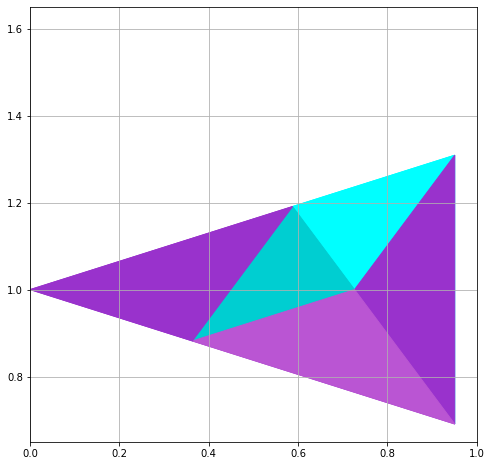

In [9]:
# Define a small rhomb
xs_small, ys_small = Small_rhomb(0,1) 


# Define triangles P and P':= Pm
xs_P = xs_small[:2] + xs_small[3:4]
ys_P = ys_small[:2] + ys_small[3:4]
# We let the left most point be the anchor point
P = np.array([(x,y) for x,y in zip(xs_P, ys_P)])
fig, ax = plt.subplots(figsize=(8,8))
Sub_P, Sub_Qm = Subdivision_P(P)

Sub_P1 = Sub_P
Sub_Qm1 = Sub_Qm

Sub_P, Sub_Qm = Subdivision_P(Sub_P1)
Sub_P, Sub_Q, Sub_Qm = Subdivision_Qm(Sub_Qm1)

#ax.fill(xs_P,ys_P)

ax.set_xlim([0,1])
ax.set_ylim([0.65,1.65])

#ax.set_xlim([-2,2])
#ax.set_ylim([-2,2])

ax.grid(1)